Node 1 sent DIO message.
Node 1 sent DIS message.
Node 1 trust metric: 0.5915699430806951
Node 1 updated trust metric: 0.47058606864147656
Node 1 energy consumption: 168.08163227966526
Node 1 sent DAO message to destination 3.
Node 2 sent DIO message.
Node 2 sent DIS message.
Node 2 trust metric: 0.9947522517229339
Node 2 updated trust metric: 0.00459716287653817
Node 2 energy consumption: 123.16966032177072
Node 2 is potentially under Sybil attack.
Node 2 sent DAO message to destination 3.
Node 2 prevented sending data packets to a detected malicious node.
Node 2 sent DAO message to destination 3.
Node 3 sent DIO message.
Node 3 sent DIS message.
Node 3 trust metric: 0.062458190026773
Node 3 updated trust metric: 0.2916818051292221
Node 3 energy consumption: 131.65131713135096
Node 3 is potentially under Sybil attack.
Node 3 sent DAO message to destination 3.
Node 4 sent DIO message.
Node 4 sent DIS message.
Node 4 trust metric: 0.6813320428513867
Node 4 updated trust metric: 0.307403

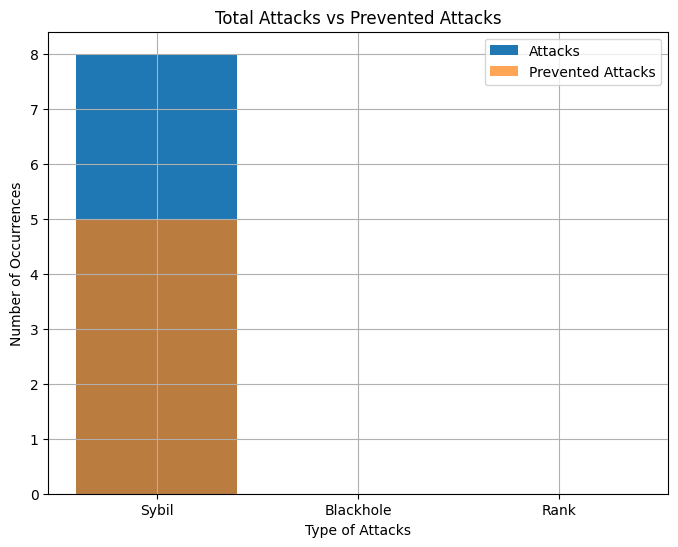

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

# Step 1: Setup the network
num_nodes = 5  # Number of nodes in the network
G = nx.Graph()
G.add_nodes_from(range(1, num_nodes + 1))
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)])

# Step 2: Implement RPL protocol
def send_dio(node):
    print(f"Node {node} sent DIO message.")

def send_dao(node, destination):
    print(f"Node {node} sent DAO message to destination {destination}.")

def send_dis(node):
    print(f"Node {node} sent DIS message.")

# Step 3: Implement MRTS
def calculate_trust_metric(node):
    return random.uniform(0, 1)

def update_trust_metric(node):
    trust_metric = calculate_trust_metric(node)
    trust_metric += random.uniform(-0.1, 0.1)
    return trust_metric

def calculate_energy_consumption(node):
    return random.uniform(100, 200)

# Step 4: Simulate attacks (Sybil)
def simulate_sybil_attack():
    num_attackers = random.randint(1, num_nodes)  # Random number of attackers
    attacker_ids = range(num_nodes + 1, num_nodes + num_attackers + 1)
    for attacker_id in attacker_ids:
        G.add_node(attacker_id)

        # Connect attacker nodes to existing nodes
        target_nodes = list(G.nodes())
        target_nodes.remove(attacker_id)
        for _ in range(3):  # Each attacker node connects to 3 existing nodes
            target = random.choice(target_nodes)
            G.add_edge(attacker_id, target)
            target_nodes.remove(target)

# Step 5: Detect attacks
def detect_sybil_attack(node):
    trust_threshold = 0.5
    trust_metric = calculate_trust_metric(node)
    if trust_metric < trust_threshold:
        print(f"Node {node} is potentially under Sybil attack.")
        return True
    return False

def detect_malicious_node(node, destination):
    trust_threshold = 0.5
    trust_metric = calculate_trust_metric(node)
    if trust_metric < trust_threshold:
        print(f"Node {node} detected malicious node {destination}.")
        return True
    return False

# Step 6: Implement attack prevention
def prevent_attack(node, destination):
    trust_threshold = 0.5
    trust_metric = calculate_trust_metric(node)
    if trust_metric >= trust_threshold:
        send_dao(node, destination)
        print(f"Node {node} prevented sending data packets to malicious nodes.")
        return True
    print(f"Node {node} failed to prevent the attack.")
    return False

def prevent_malicious_node(node, destination):
    trust_threshold = 0.5
    trust_metric = calculate_trust_metric(node)
    if trust_metric >= trust_threshold:
        send_dao(node, destination)
        print(f"Node {node} prevented sending data packets to a detected malicious node.")
        return True
    print(f"Node {node} failed to prevent the attack.")
    return False

def prevent_rank_attack(node, destination):
    trust_threshold = 0.5
    trust_metric = calculate_trust_metric(node)
    if trust_metric >= trust_threshold:
        send_dao(node, destination)
        print(f"Node {node} prevented sending data packets to a node with lower rank.")
        return True
    print(f"Node {node} failed to prevent the attack.")
    return False

def prevent_blackhole_attack(node, destination):
    trust_threshold = 0.5
    trust_metric = calculate_trust_metric(node)
    if trust_metric >= trust_threshold:
        send_dao(node, destination)
        print(f"Node {node} prevented sending data packets to a Blackhole node.")
        return True
    print(f"Node {node} failed to prevent the attack.")
    return False

# Step 7: Simulate attacks (Blackhole)
def simulate_blackhole_attack():
    attacker_id = random.randint(num_nodes + 1, num_nodes + 100)  # Random attacker ID
    G.add_node(attacker_id)

    # Connect attacker node to existing nodes
    target_nodes = list(G.nodes())
    target_nodes.remove(attacker_id)
    for target in target_nodes:
        G.add_edge(attacker_id, target)

def detect_blackhole_attack(node):
    attacker_ids = [attacker for attacker in G.nodes() if attacker > num_nodes]
    if node in attacker_ids:
        print(f"Node {node} is under Blackhole attack.")
        return True
    return False

# Step 8: Simulate attacks (Rank)
def simulate_rank_attack():
    attacker_id = random.randint(num_nodes + 1, num_nodes + 100)  # Random attacker ID
    G.add_node(attacker_id)

    # Connect attacker node to existing nodes
    target_nodes = list(G.nodes())
    target_nodes.remove(attacker_id)
    for _ in range(3):  # Each attacker node connects to 3 existing nodes
        target = random.choice(target_nodes)
        G.add_edge(attacker_id, target)
        target_nodes.remove(target)

def detect_rank_attack(node):
    attacker_ids = [attacker for attacker in G.nodes() if attacker > num_nodes]
    if node in attacker_ids:
        print(f"Node {node} is potentially under Rank attack.")
        return True
    return False

# Simulation and data collection
num_simulations = 4
total_sybil_attacks = 0
total_blackhole_attacks = 0
total_rank_attacks = 0

total_prevented_sybil_attacks = 0
total_prevented_blackhole_attacks = 0
total_prevented_rank_attacks = 0

attack_detected = []
attack_prevented = []

# Run the simulations
for _ in range(num_simulations):
    G = nx.Graph()  # Reset the network for each simulation
    G.add_nodes_from(range(1, num_nodes + 1))
    G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)])

    simulate_sybil_attack()
    simulate_blackhole_attack()
    simulate_rank_attack()

    # Run the MRTS algorithm for each node in the network
    for node in G.nodes():
        send_dio(node)
        send_dis(node)
        trust_metric = calculate_trust_metric(node)
        updated_trust_metric = update_trust_metric(node)
        energy_consumption = calculate_energy_consumption(node)
        print(f"Node {node} trust metric: {trust_metric}")
        print(f"Node {node} updated trust metric: {updated_trust_metric}")
        print(f"Node {node} energy consumption: {energy_consumption}")

        # Detect Sybil attacks
        if detect_sybil_attack(node):
            attack_detected.append(node)
            total_sybil_attacks += 1

        # Detect Blackhole attacks
        if detect_blackhole_attack(node):
            attack_detected.append(node)
            total_blackhole_attacks += 1

        # Detect Rank attacks
        if detect_rank_attack(node):
            attack_detected.append(node)
            total_rank_attacks += 1

        # Detect and prevent attacks
        destination = random.choice(list(G.nodes()))

        # Prevent Sybil attacks
        if detect_sybil_attack(node):
            if prevent_malicious_node(node, destination):
                attack_prevented.append(node)
                total_prevented_sybil_attacks += 1

        # Prevent Blackhole attacks
        if detect_blackhole_attack(node):
            if prevent_blackhole_attack(node, destination):
                attack_prevented.append(node)
                total_prevented_blackhole_attacks += 1

        # Prevent Rank attacks
        if detect_rank_attack(node):
            if prevent_rank_attack(node, destination):
                attack_prevented.append(node)
                total_prevented_rank_attacks += 1

        # Normal operation, no attack detected
        send_dao(node, destination)

# Generate a graph for total attacks vs prevented attacks
x = np.arange(3)
total_attacks = [total_sybil_attacks, total_blackhole_attacks, total_rank_attacks]
total_prevented_attacks = [total_prevented_sybil_attacks, total_prevented_blackhole_attacks, total_prevented_rank_attacks]

plt.figure(figsize=(8, 6))
plt.bar(x, total_attacks, label='Attacks')
plt.bar(x, total_prevented_attacks, label='Prevented Attacks', alpha=0.7)
plt.xticks(x, ['Sybil', 'Blackhole', 'Rank'])
plt.xlabel('Type of Attacks')
plt.ylabel('Number of Occurrences')
plt.title('Total Attacks vs Prevented Attacks')
plt.legend()
plt.grid(True)
plt.show()
